In [1]:
import molsysmt as msm
import pyunitwizard as puw
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
molsys = msm.convert('traj.h5msm', selection='molecule_type=="peptide"')

In [3]:
msm.info(molsys)

form,n_atoms,n_groups,n_components,n_chains,n_molecules,n_entities,n_peptides,n_structures
molsysmt.MolSys,22,3,1,1,1,1,1,50001


In [4]:
phi, psi = msm.structure.get_dihedral_angles(molsys, phi=True, psi=True)

/fast_data/home/diego/miniconda3/envs/MSN-playground@uibcdf_3.12/lib/python3.12/site-packages/pandas/core/construction.py:630: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  data = np.asarray(data)


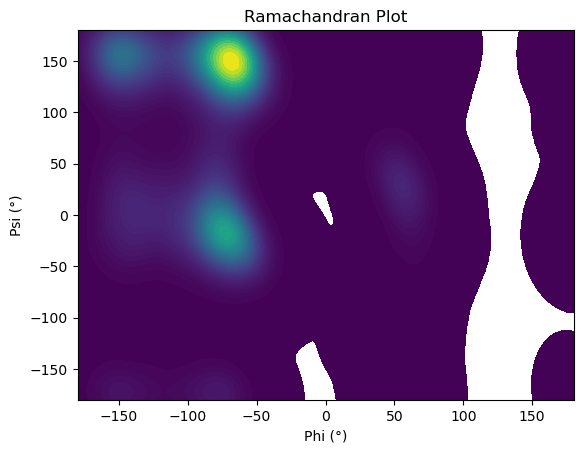

In [5]:
ax = sns.kdeplot(
    x=phi[:, 0], 
    y=psi[:, 0], 
    fill=True, cmap='viridis', 
    thresh=0.0000001, levels=40
)

# Etiquetas y título (ajústalas según tu caso)
ax.set_xlabel('Phi (°)')
ax.set_ylabel('Psi (°)')
ax.set_xlim([-180.0, 180.0])
ax.set_ylim([-180.0, 180.0])
ax.set_title('Ramachandran Plot')

plt.show()

In [6]:
trajectory_phipsi = puw.utils.numpy.column_stack([phi[:,0], psi[:,0]])

In [7]:
trajectory_phipsi.shape

(50001, 2)

In [8]:
import pickle

In [9]:
with open('trajectory_phipsi.pkl', 'wb') as f:
    pickle.dump(trajectory_phipsi, f)